In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from statsmodels.graphics.regressionplots import *
from statsmodels.graphics.gofplots import *
import sklearn.metrics as metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score,recall_score, precision_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
%matplotlib inline

## Q10

In [2]:
# import data
week= pd.read_csv('data/Weekly.csv')
week.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [3]:
week.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1089 entries, 0 to 1088
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       1089 non-null   int64  
 1   Lag1       1089 non-null   float64
 2   Lag2       1089 non-null   float64
 3   Lag3       1089 non-null   float64
 4   Lag4       1089 non-null   float64
 5   Lag5       1089 non-null   float64
 6   Volume     1089 non-null   float64
 7   Today      1089 non-null   float64
 8   Direction  1089 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 76.7+ KB


### a. produce numerical and graphical summaries of the data. Do there appear to be any patterns?

In [4]:
week.Direction = np.where(week.Direction=='Down', 0,1)

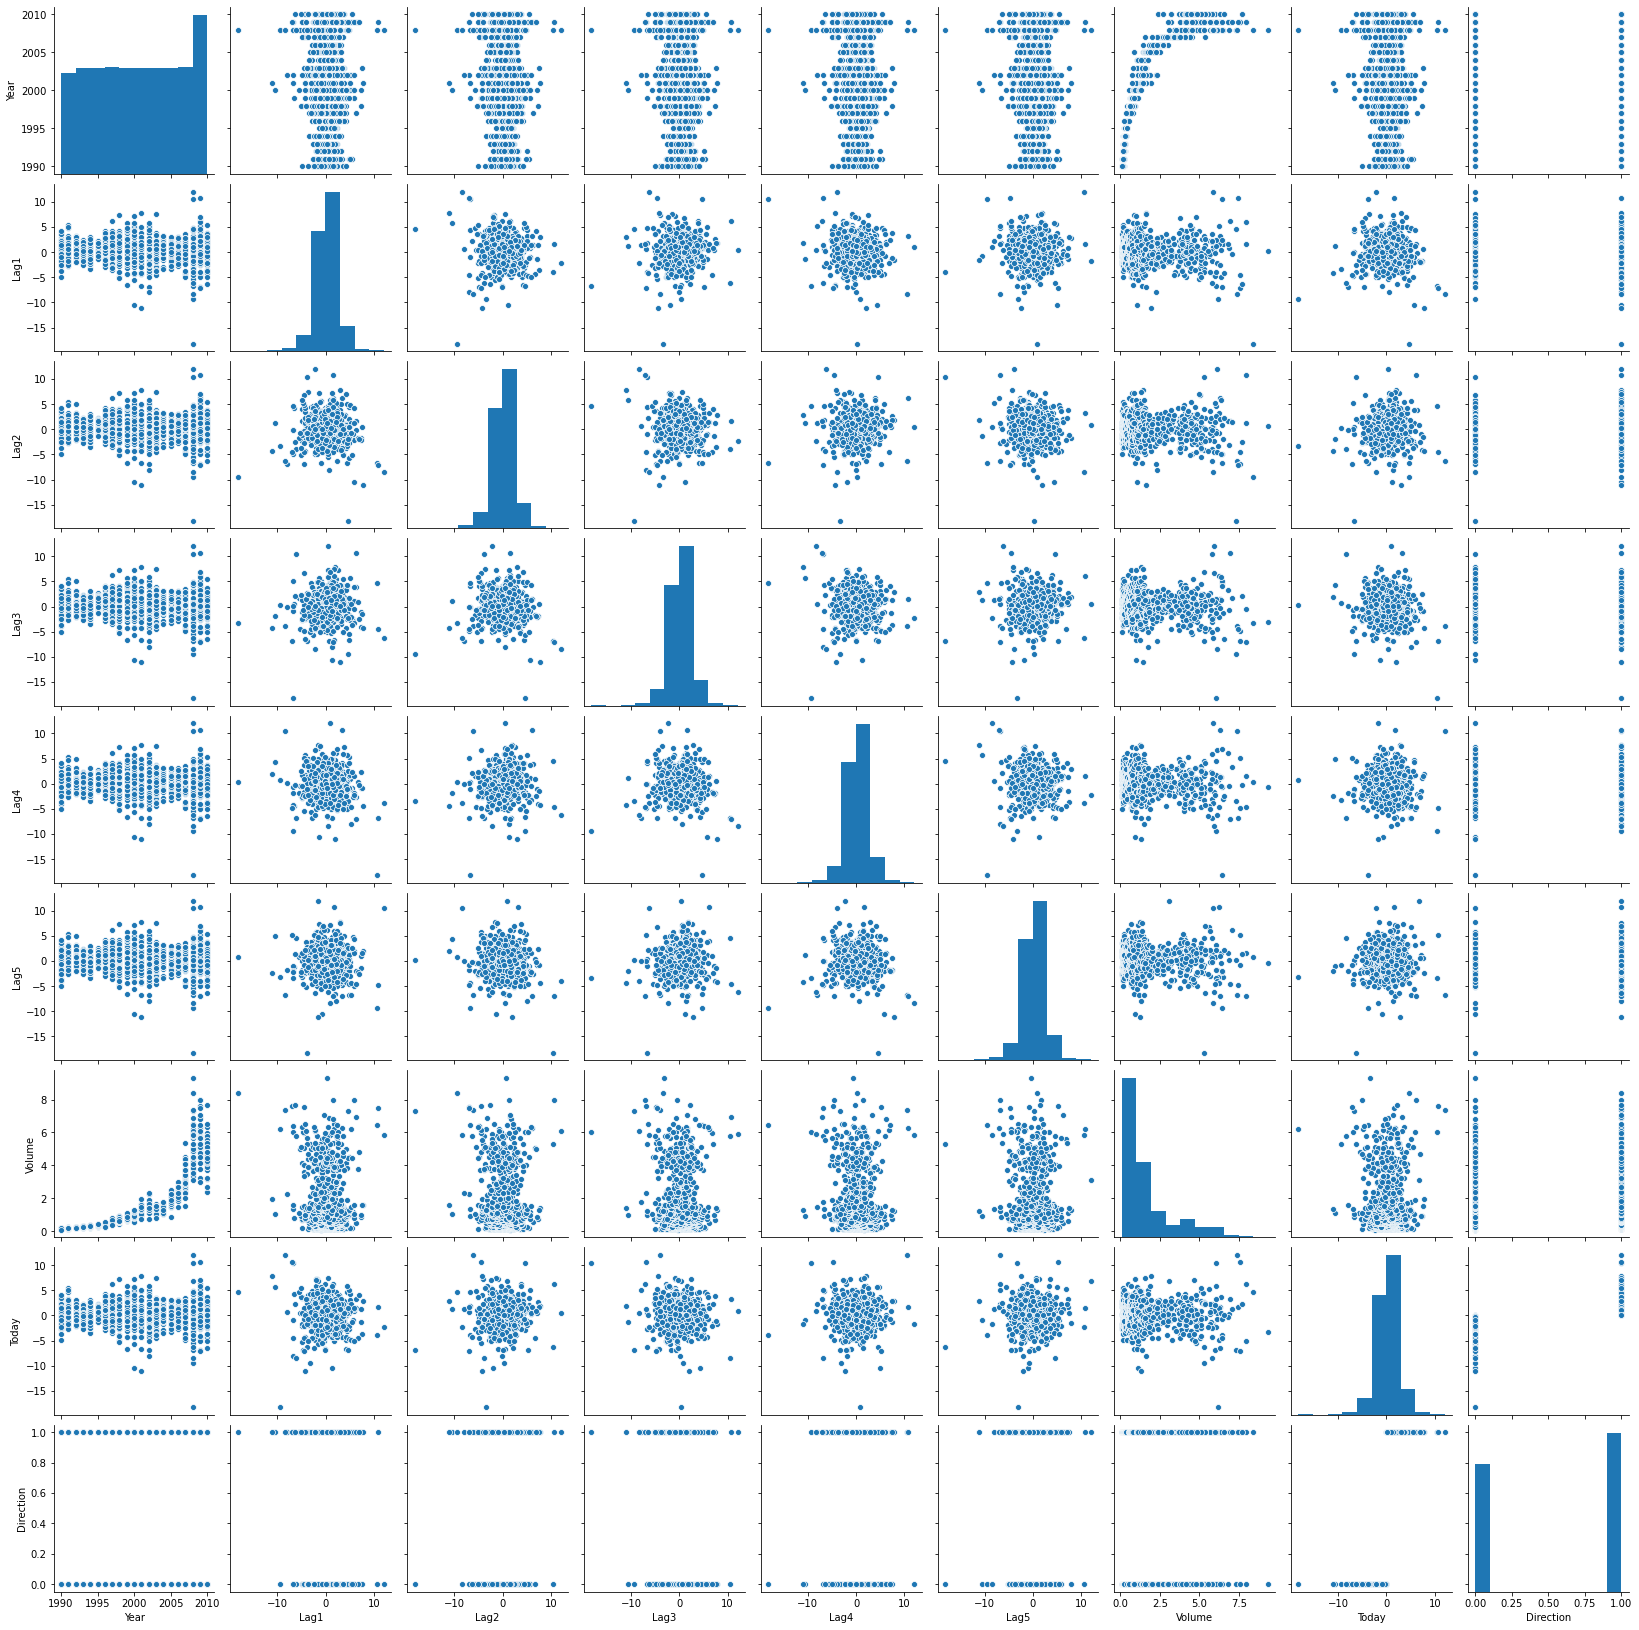

In [5]:
# Pairplot
sns.pairplot(week);

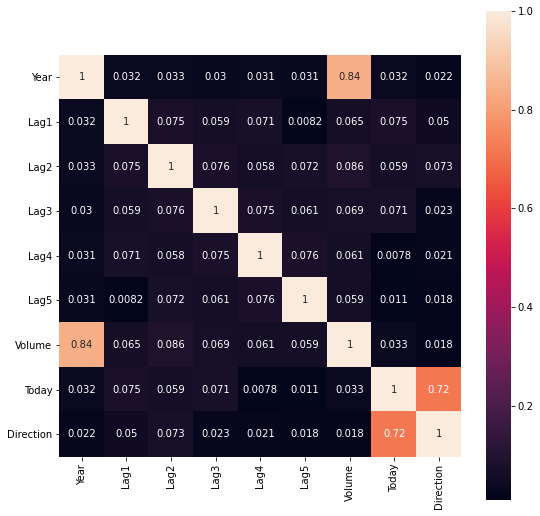

In [6]:
# correlation matrix
corr_mat = week.corr().abs()
fig, ax = plt.subplots(figsize= (9,9))
sns.heatmap(corr_mat, vmax=1, square=True, annot=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0);

The correlation matrix shows that there are two paris features are correlated:

a. Year- Volume. The volume increases with the Year exponentially.

b. Today-Direction.There is a logistic relationship between Today and Direction. As today less than 0, direction is 'Down', as today is larger than 0, direction is 'up'. This might be duplicated information. 

### b. Use the full data set to perform a logistic regression with direction as the response and five lag variables plus volume as predictors.  Do any predicors appear to be statistically siginificant?

In [7]:
# Fit model
formub = 'Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume'
modelb = smf.logit(formula=formub, data=week).fit()
# Display model summary
display(modelb.summary())

# Do any of the predictors appear to be statistically significant?
display(pd.DataFrame({'p>|z|': modelb.pvalues[modelb.pvalues < 0.05].drop('Intercept')}))

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Wed, 09 Sep 2020   Pseudo R-squ.:                0.006580
Time:                        09:52:42   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

,p>|z|
Lag2,0.029601


### c. compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression. 

In [8]:
from sklearn.linear_model import LogisticRegression
X = week[['Lag1','Lag2', 'Lag3', 'Lag4', 'Lag5','Volume']]
y = week.Direction
clf = LogisticRegression()
clf.fit(X, y)
y_pred = clf.predict(X)


C:\Users\Zhefei\Program files\Anaconda\install\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
def confusion_table(confusion_mtx):
    confusion_df = pd.DataFrame({'Pred down': np.append(confusion_mtx[:, 0], confusion_mtx.sum(axis=0)[0]),
                                 'Pred up': np.append(confusion_mtx[:, 1], confusion_mtx.sum(axis=0)[1]),
                                 'Total': np.append(confusion_mtx.sum(axis=1), ''),
                                 '': ['Actual down', 'Actual up', 'Total']}).set_index('')
    return confusion_df

def classifier_scores(ytest,ypre):
    return pd.Series({'precision': precision_score(ytest,ypre),
                      'recall': recall_score(ytest,ypre),
                      'accuracy': accuracy_score(ytest,ypre),
                      'F1_score': f1_score(ytest,ypre)})

In [19]:
print(classification_report(y,y_pred))
confusion_mtx = confusion_matrix(y,y_pred)
display(confusion_table(confusion_mtx))

              precision    recall  f1-score   support

           0       0.54      0.11      0.19       484
           1       0.57      0.92      0.70       605

    accuracy                           0.56      1089
   macro avg       0.55      0.52      0.44      1089
weighted avg       0.55      0.56      0.47      1089



,Pred down,Pred up,Total
,,,
Actual down,55,429,484
Actual up,47,558,605
Total,102,987,


1. The overall fraction of correct predictions is 0.56
2. According to the confusion matrix, the false positive is large (429), while the true negative is only 55, which means that the most 'down' cases was not predicted by the model correctly.   

### d. fit the logistic regresson model using training data period from 1990 to 2008, with lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data. 

In [20]:
X_train = week[(week.Year>1989) & (week.Year<2009)].Lag2.values.reshape(-1,1)
y_train =week[(week.Year>1989) & (week.Year<2009)].Direction
X_test = week[week.Year>2008].Lag2.values.reshape(-1,1)
y_test = week[week.Year>2008].Direction
clfd = clf.fit(X_train, y_train)
y_predd = clf.predict(X_test)

C:\Users\Zhefei\Program files\Anaconda\install\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
print(classification_report(y_test,y_predd))
confusion_mtx = confusion_matrix(y_test,y_predd)
display(confusion_table(confusion_mtx))
# true = pd.Categorical(list(np.where(np.array(y_test) == 1, 'up','down')), categories = ['up','down'])
# pred = pd.Categorical(list(np.where(np.array(y_predd) == 1, 'up','down')), categories = ['up','down'])

# pd.crosstab(pred, true, 
#             rownames=['pred'], 
#             colnames=['Actual'], margins=False, margins_name="Total")

              precision    recall  f1-score   support

           0       0.64      0.21      0.32        43
           1       0.62      0.92      0.74        61

    accuracy                           0.62       104
   macro avg       0.63      0.56      0.53       104
weighted avg       0.63      0.62      0.57       104



,Pred down,Pred up,Total
,,,
Actual down,9,34,43
Actual up,5,56,61
Total,14,90,


The overall fraction of correct predictions (accuracy) is 0.62

### e. repeat d using LDA

In [23]:
# Fit model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Predict
y_pred_lda = lda.predict(X_test)

# Confusion table
print(classification_report(y_test,y_pred_lda))
confusion_mtx = confusion_matrix(y_test,y_pred_lda)
display(confusion_table(confusion_mtx))

              precision    recall  f1-score   support

           0       0.64      0.21      0.32        43
           1       0.62      0.92      0.74        61

    accuracy                           0.62       104
   macro avg       0.63      0.56      0.53       104
weighted avg       0.63      0.62      0.57       104



,Pred down,Pred up,Total
,,,
Actual down,9,34,43
Actual up,5,56,61
Total,14,90,


### f. repeat d usig QDA

In [24]:
# Fit model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Predict
y_pred_qda = qda.predict(X_test)

# Confusion table
print(classification_report(y_test,y_pred_qda))
confusion_mtx = confusion_matrix(y_test,y_pred_qda)
display(confusion_table(confusion_mtx))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.59      1.00      0.74        61

    accuracy                           0.59       104
   macro avg       0.29      0.50      0.37       104
weighted avg       0.34      0.59      0.43       104



C:\Users\Zhefei\Program files\Anaconda\install\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


,Pred down,Pred up,Total
,,,
Actual down,0,43,43
Actual up,0,61,61
Total,0,104,


QDA predict all case as up, so the precision, recall for y=0 is all 0. Certainly, this model should not be selected. 

### g. repeat d using KNN with k =1

In [25]:
from sklearn.neighbors import KNeighborsClassifier
# Model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# predict
y_pred_knn = knn.predict(X_test)

# Confusion table
print(classification_report(y_test,y_pred_knn))
confusion_mtx = confusion_matrix(y_test,y_pred_knn)
display(confusion_table(confusion_mtx))

              precision    recall  f1-score   support

           0       0.40      0.49      0.44        43
           1       0.58      0.49      0.53        61

    accuracy                           0.49       104
   macro avg       0.49      0.49      0.49       104
weighted avg       0.51      0.49      0.49       104



,Pred down,Pred up,Total
,,,
Actual down,21,22,43
Actual up,31,30,61
Total,52,52,


### h. which of these methods appears to provide the best results on this data?

In [66]:
def classifier_scores(ytest,ypre):
    return pd.Series({'precision': precision_score(ytest,ypre),
                      'recall': recall_score(ytest,ypre),
                      'accuracy': accuracy_score(ytest,ypre),
                      'F1_score': f1_score(ytest,ypre)})

In [67]:
clf_scores = classifier_scores(y_test,y_predd)
lda_scores = classifier_scores(y_test,y_pred_lda)
qda_scores = classifier_scores(y_test,y_pred_qda)
knn_scores = classifier_scores(y_test,y_pred_knn)

scores= pd.DataFrame({'logit': clf_scores,
                        'lda'  : lda_scores,
                        'qda'  : qda_scores,
                        'knn'  : knn_scores}).T
display(scores.T)

,logit,lda,qda,knn
precision,0.622222,0.622222,0.586538,0.576923
recall,0.918033,0.918033,1.000000,0.491803
accuracy,0.625000,0.625000,0.586538,0.490385
F1_score,0.741722,0.741722,0.739394,0.530973


1. QDA predict all case as 'up', so this model will not be considered. 
2. the prediction of logit and ida are the same, so only need to analysis one of them.
3. prefer to choose 'F1_score' as metric to evaluate

<AxesSubplot:ylabel='F1_score'>

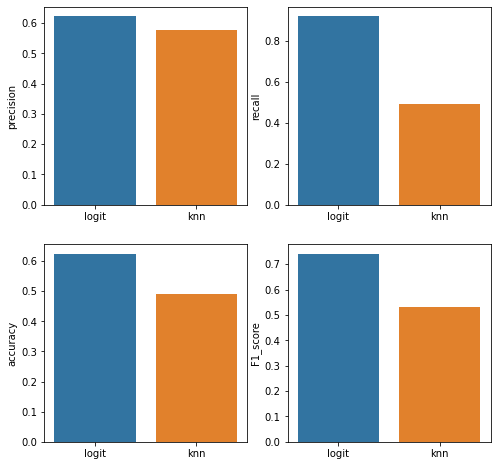

In [68]:
scores2= pd.DataFrame({'logit': clf_scores,
                        'knn'  : knn_scores}).T
fig, axes = plt.subplots(nrows =2, ncols =2,figsize=(8,8))
sns.barplot(x=scores2.index, y=scores2['precision'], ax=axes[0,0])
sns.barplot(x=scores2.index, y=scores2['recall'], ax=axes[0,1])
sns.barplot(x=scores2.index, y=scores2['accuracy'], ax=axes[1,0])
sns.barplot(x=scores2.index, y=scores2['F1_score'], ax=axes[1,1])


### i. experiment with different combinations of predictors.

C:\Users\Zhefei\Program files\Anaconda\install\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Zhefei\Program files\Anaconda\install\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Zhefei\Program files\Anaconda\install\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Zhefei\Program files\Anaconda\install\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Zhefei\Program files\Anaconda\install\lib\site-packages\sklearn\linear_model\lo

Text(0.5, 1.0, 'Logit')

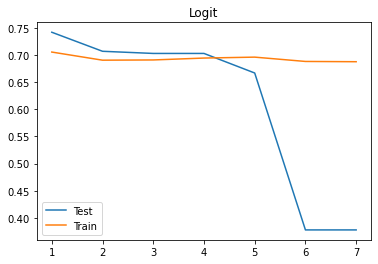

In [104]:
# examine predictors
y_traini = week[(week.Year>1989) & (week.Year<2009)].Direction
y_testi = week[week.Year>2008].Direction

predictors = ['Lag2', 'Lag1', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Year']
clf_features = {}
clf_features2 = {}
for i in range(1,len(predictors)+1):
    X_traini = week[(week.Year>1989) & (week.Year<2009)][predictors[:i]]
    X_testi = week[week.Year>2008][predictors[:i]]
    # logit
    clfdi =  LogisticRegression().fit(X_traini, y_traini)
    y_preddi = clfdi.predict(X_testi)
    clf_features[i] = f1_score(y_testi,y_preddi)
    clf_features2[i] = f1_score(y_traini,clfdi.predict(X_traini))

plt.figure()
plt.plot(*zip(*sorted(clf_features.items())),label="Test")
plt.plot(*zip(*sorted(clf_features2.items())),label="Train")
plt.legend(loc='lower left')
plt.title('Logit')

Text(0.5, 1.0, 'QDA')

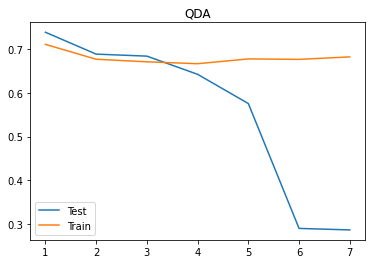

In [106]:
clf_features = {}
clf_features2 = {}
for i in range(1,len(predictors)+1):
    X_traini = week[(week.Year>1989) & (week.Year<2009)][predictors[:i]]
    X_testi = week[week.Year>2008][predictors[:i]]
    # qda
    qdai =  qda.fit(X_traini, y_traini)
    y_preddi = qdai.predict(X_testi)
    clf_features[i] = f1_score(y_testi,y_preddi)
    clf_features2[i] = f1_score(y_traini,qdai.predict(X_traini))

plt.figure()
plt.plot(*zip(*sorted(clf_features.items())),label="Test")
plt.plot(*zip(*sorted(clf_features2.items())),label="Train")
plt.legend(loc='lower left')
plt.title('QDA')